## Import event log

- Describe and visualize the general underlying process flow. Make sure you provide a reasonable level of abstraction. You may use BPMN / Petri Nets.

- How long do the different process instances take? Are there any notable patterns?
- Are there any bottlenecks? If yes, where? If yes, can you think of any reasons?
    -> Prozessdauer vizualisieren auf Petri Net(?)
 
- Are there any patterns that would suggest non-conformance?
    -> Conformance [check from PM4PY](https://pm4py.fit.fraunhofer.de/documentation#conformance)

--- 
- How many applications get rejected? Can you find any reasons?

- Can you find any unexpected behavior, e.g. missing permits?

- Are there notable differences between international and domestic declarations?

- What is missing to provide more detailed insights into the processes?

- Reflect on where supervised / unsupervised machine learning techniques could help to obtain further insights.
 
- Can you think of useful KPIs for the processes?

- Make specific recommendations for improving the processes


In [406]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [407]:
domestic_path = 'data/DomesticDeclarations.xes'
international_path = 'data/InternationalDeclarations.xes'

log= pm4py.read_xes(domestic_path);

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

## Statistical Analysis of Event Data

In [408]:
log.head(10)

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 08:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 10:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 08:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 16:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
5,st_step 86799_0,STAFF MEMBER,Declaration APPROVED by PRE_APPROVER,2017-02-22 09:29:21+00:00,PRE_APPROVER,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
6,st_step 86797_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-02-23 07:14:45+00:00,SUPERVISOR,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
7,dd_declaration 86795_19,SYSTEM,Request Payment,2017-03-06 13:07:25+00:00,UNDEFINED,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
8,dd_declaration 86795_20,SYSTEM,Payment Handled,2017-03-13 16:30:59+00:00,UNDEFINED,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
9,st_step 86804_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:13:33+00:00,EMPLOYEE,declaration 86800,declaration 86800,budget 86566,declaration number 86801,320.646137


In [409]:
# show rows where case:id not equal case:concept:name
log[log['case:id'] != log['case:concept:name']]

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount


It looks like case_id and case_concept_name columns are the same.

In [410]:
# to improve readability we trim the word 'Declaration' out of concept:name column, if it exists
log['concept:name'] = log['concept:name'].str.replace('Declaration ', '')

In [411]:
# pick random case
case_ids = log['case:id'].unique()
random_case = log[log['case:id'] == np.random.choice(case_ids)]
random_case = random_case.sort_values(by='time:timestamp')
random_case

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
707,st_step 88844_0,STAFF MEMBER,SUBMITTED by EMPLOYEE,2017-02-06 12:27:22+00:00,EMPLOYEE,declaration 88842,declaration 88842,budget 86566,declaration number 88843,32.696927
708,st_step 88845_0,STAFF MEMBER,FINAL_APPROVED by SUPERVISOR,2017-02-06 12:27:30+00:00,SUPERVISOR,declaration 88842,declaration 88842,budget 86566,declaration number 88843,32.696927
709,dd_declaration 88842_19,SYSTEM,Request Payment,2017-02-15 13:40:51+00:00,UNDEFINED,declaration 88842,declaration 88842,budget 86566,declaration number 88843,32.696927
710,dd_declaration 88842_20,SYSTEM,Payment Handled,2017-02-20 16:31:51+00:00,UNDEFINED,declaration 88842,declaration 88842,budget 86566,declaration number 88843,32.696927


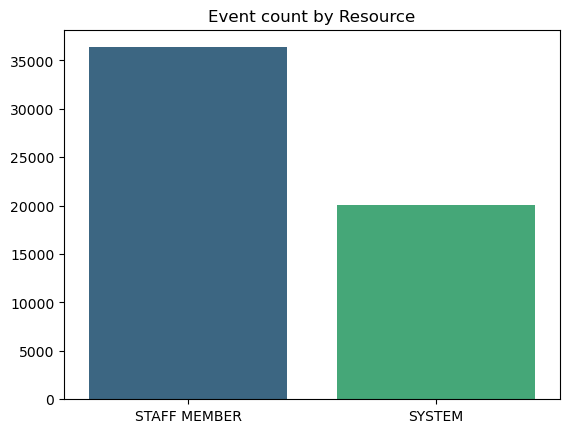

In [412]:
resources = log['org:resource'].unique()
sns.countplot(x='org:resource', data=log, palette='viridis').set(title='Event count by Resource', xlabel='', ylabel='');

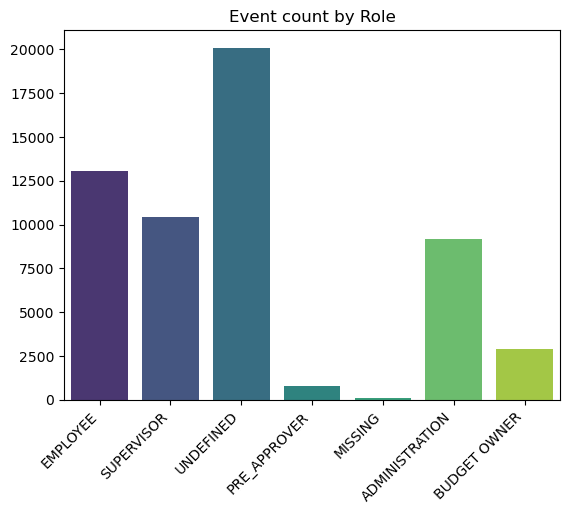

In [413]:
roles = log['org:role'].unique()
sns.countplot(x='org:role', data=log, palette='viridis').set(title='Event count by Role', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

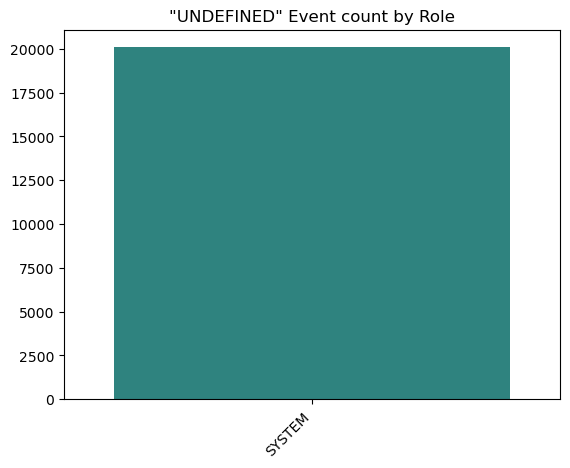

In [414]:
log_i = log[log['org:role'] == 'UNDEFINED']
sns.countplot(x='org:resource', data=log_i, palette='viridis').set(title='"UNDEFINED" Event count by Role', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

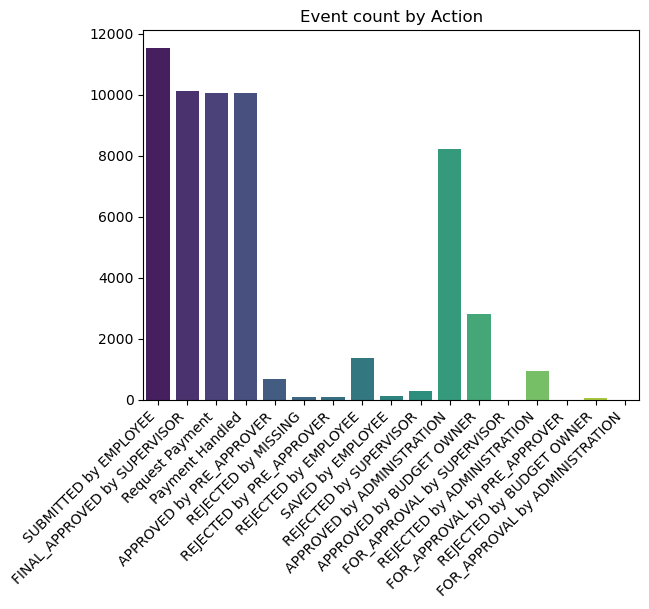

In [415]:
actions = log['concept:name'].unique()
sns.countplot(x='concept:name', data=log, palette='viridis').set(title='Event count by Action', xlabel='', ylabel='')
plt.xticks(rotation=45, ha='right');

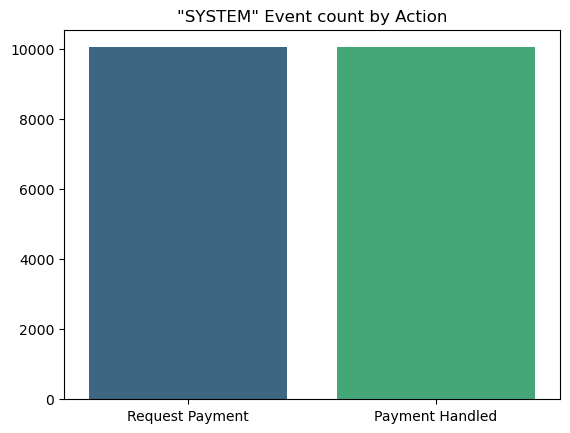

In [416]:
# System Events
log_s = log[log['org:resource'] == 'SYSTEM']
sns.countplot(x='concept:name', data=log_s, palette='viridis').set(title='"SYSTEM" Event count by Action', xlabel='', ylabel='');

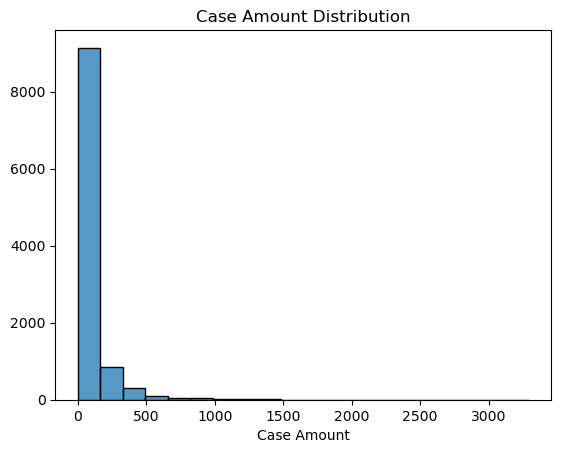

In [417]:
# case amount distribution for distinct case:id
distinct_case_amounts = log.groupby('case:id')['case:Amount'].max()
sns.histplot(distinct_case_amounts, kde=False, bins=20).set(title='Case Amount Distribution', xlabel='Case Amount', ylabel='');

## Process Discovery

Having mined the model we may vizualize it as a Process Tree or Petri Net.

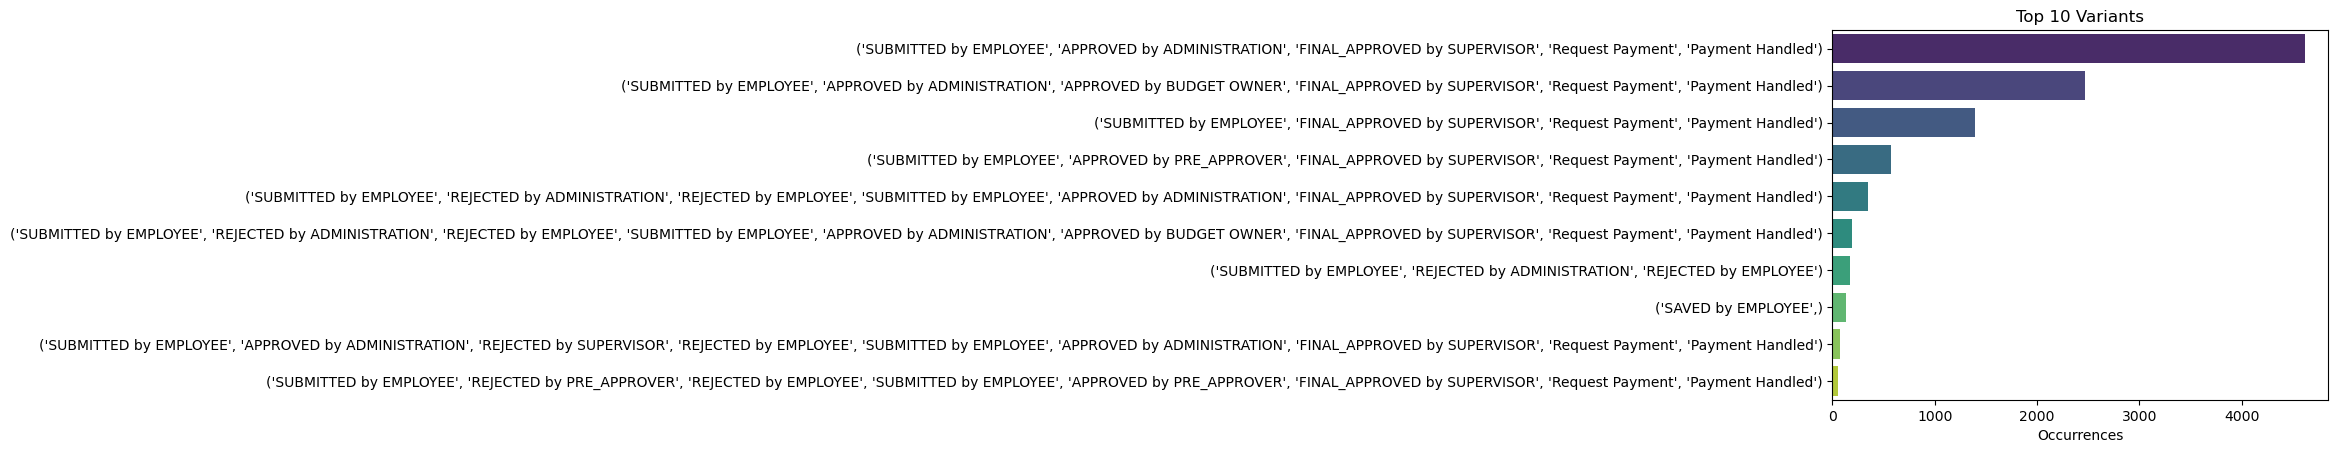

In [418]:
variants_dict = pm4py.get_variants(log)

variants_arr = []
idx = 1
for variant, n in variants_dict.items():
    variant_in_dict = {}
    variant_in_dict['variant_number'] = idx
    variant_in_dict['variant_count'] = n
    variant_in_dict['variant_trace'] = variant
    
    variants_arr.append(variant_in_dict)
    
    idx += 1


variants_df = pd.DataFrame(variants_arr)
variants_df = variants_df.sort_values(by='variant_count', ascending=False)

sns.barplot(x='variant_count', y='variant_trace', data=variants_df[:10], palette='viridis').set(title='Top 10 Variants', xlabel='Occurrences', ylabel='');

In [419]:
cases = log['case:id'].unique()
count_cases_top_10 = variants_df[:10]['variant_count'].sum()
print(f'Top 10 variants account for {count_cases_top_10:,} cases out of {len(cases):,}.')

Top 10 variants account for 10,033 cases out of 10,500.


## Check out BPMN Model

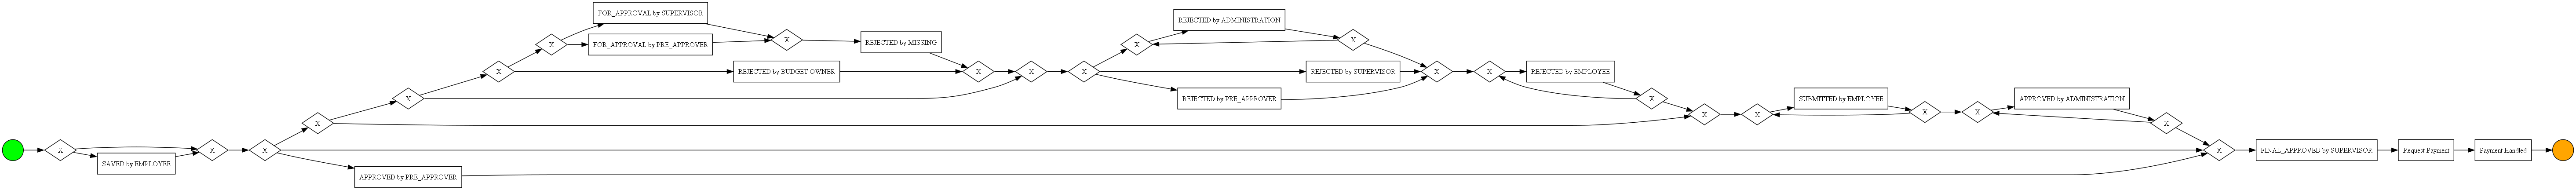

In [420]:
bpmn_model = pm4py.discover_bpmn_inductive(
    log=log,
    noise_threshold=0.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_bpmn(bpmn_model)

In BPMN model "x" stands for choice. We may observe that algorithm mined a model with a lot of choices and shortcuts. But on the end of the process it needs to be approved by supervisor. Last two stepps are done by system.

## Process Tree

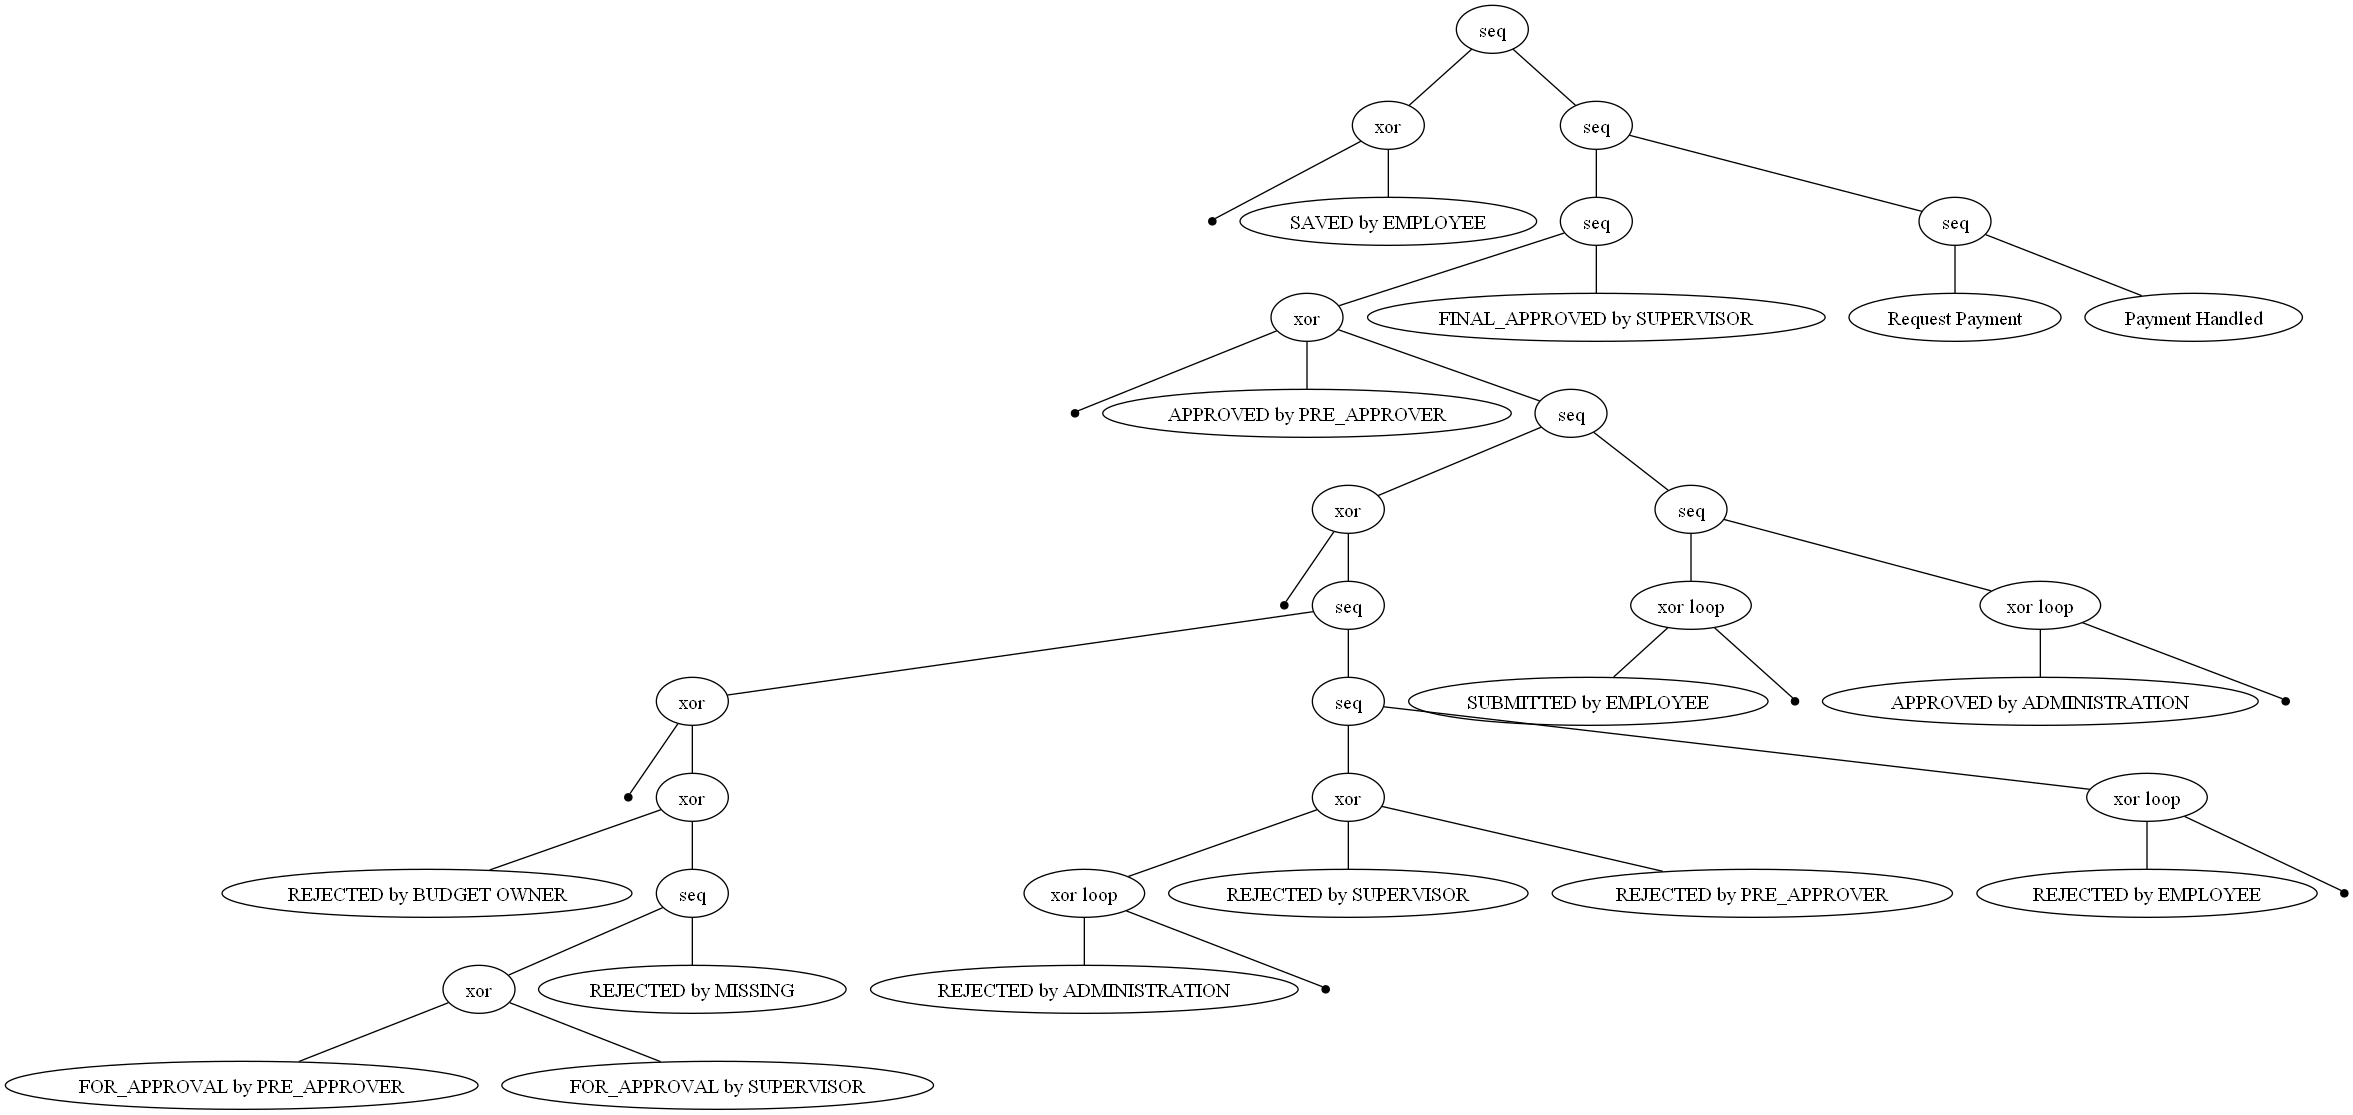

In [421]:
process_tree = pm4py.discover_process_tree_inductive(
    log=log,
    noise_threshold=.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_process_tree(process_tree)

## Petri Net

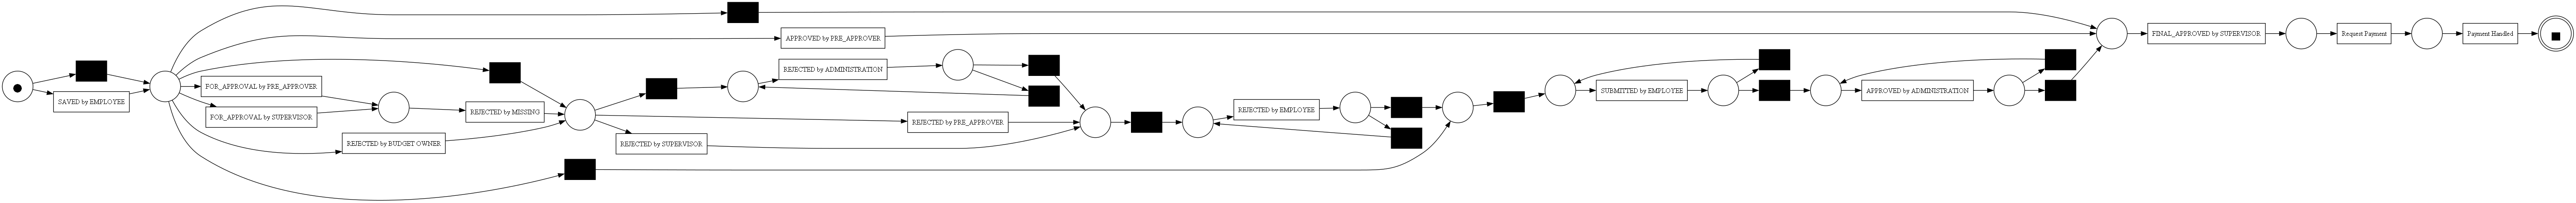

In [422]:
p_net, im, fm = pm4py.discover_petri_net_inductive(
    log=log,
    noise_threshold=.8,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_petri_net(p_net, im, fm)

## Directly-Follows Graph

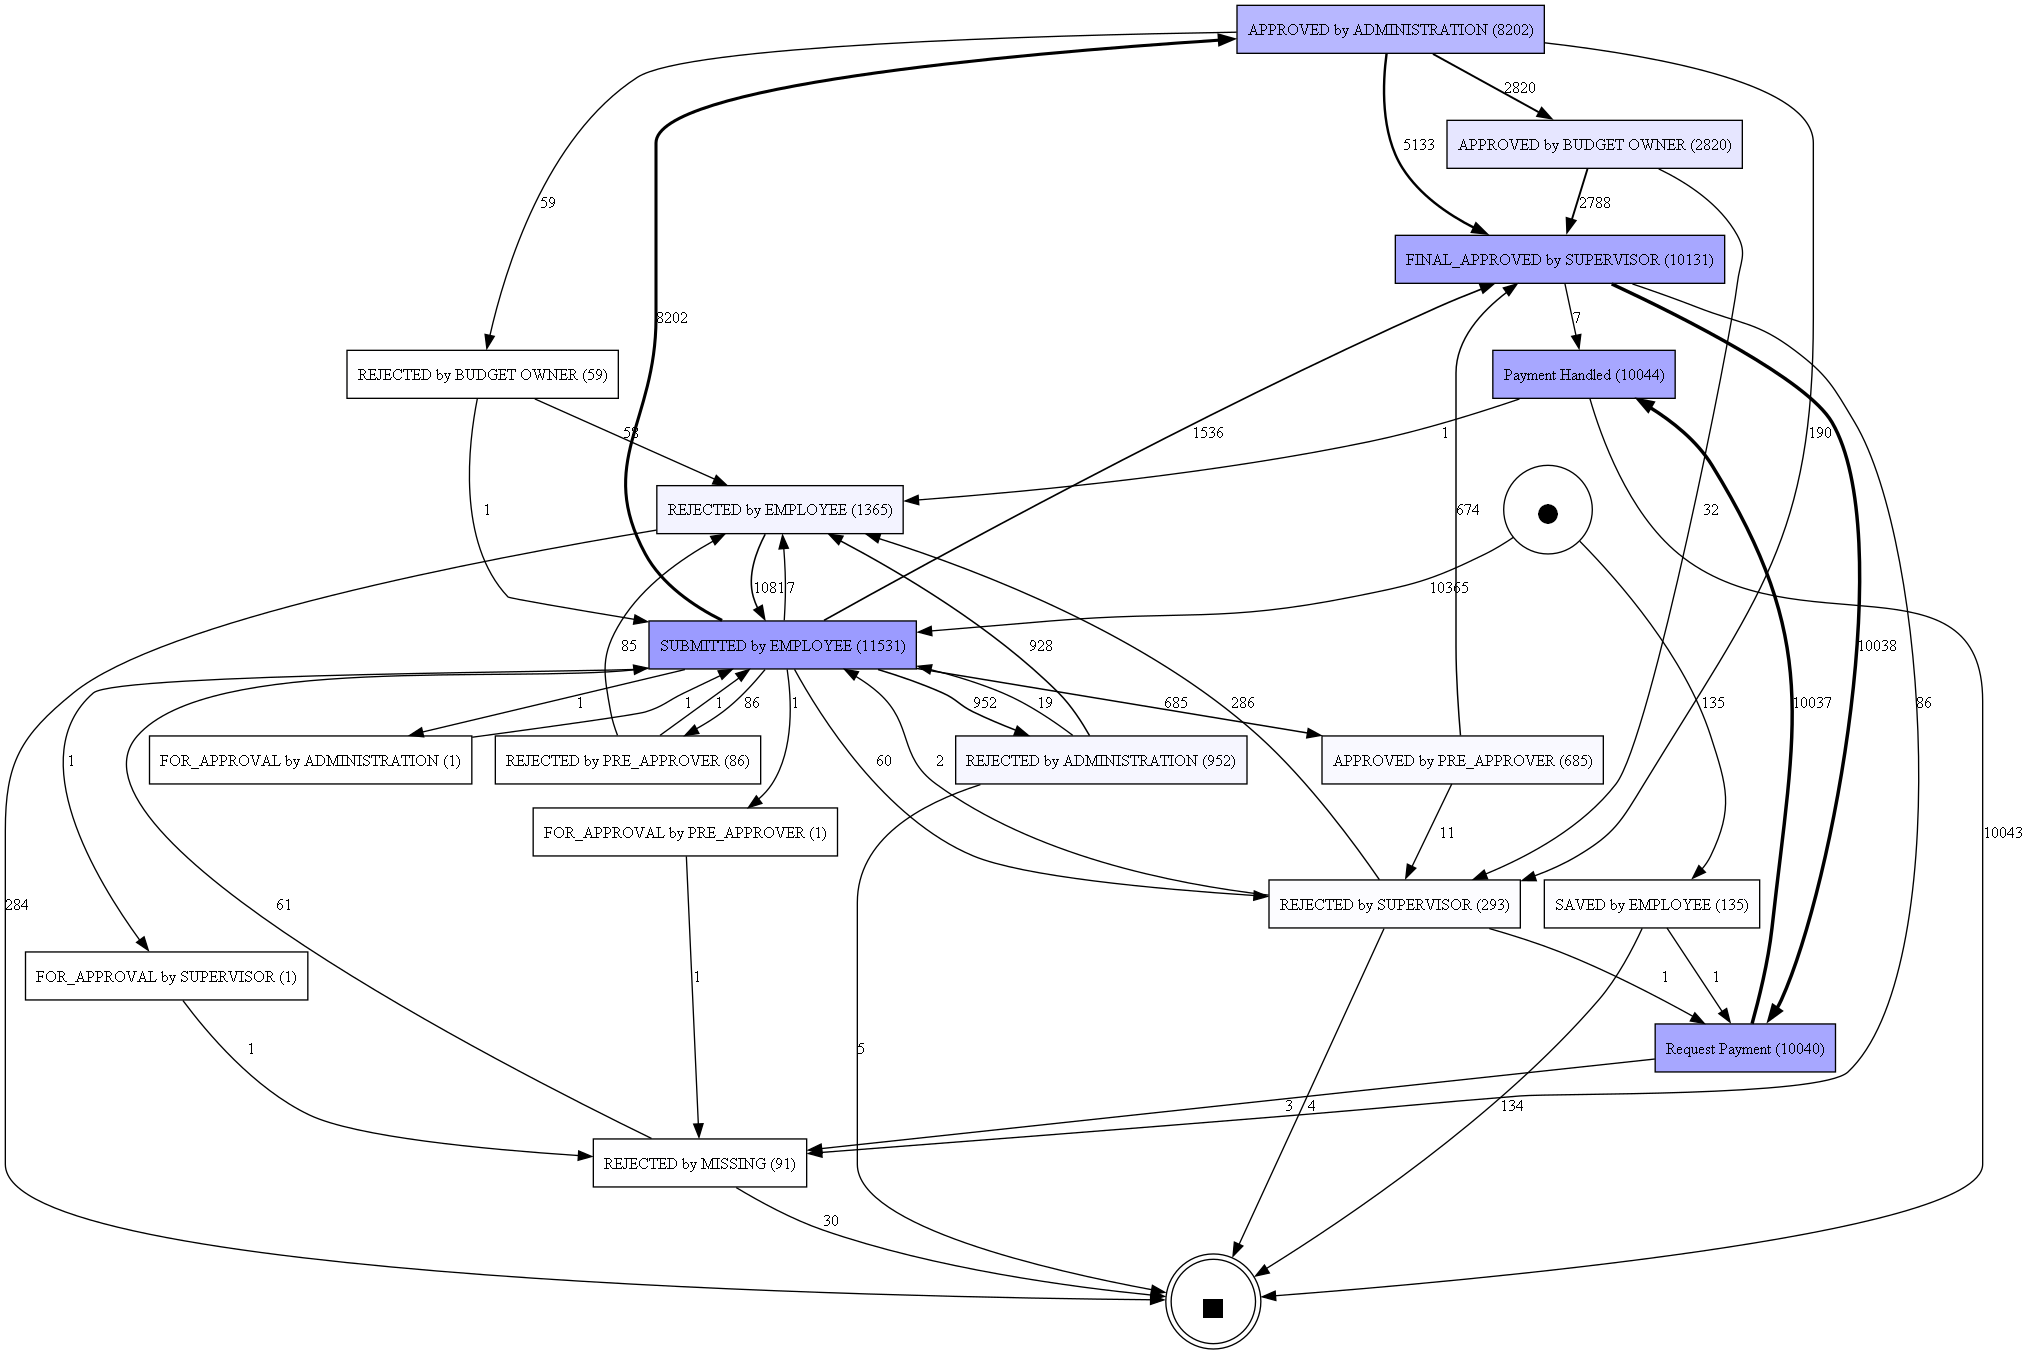

In [423]:
dfg, sa, ea = pm4py.discover_dfg(
    log=log,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:id'
)
pm4py.view_dfg(dfg, sa, ea)

Data Granularity mismatch?

TODO: Try to reshuffle events into new categories and create models again.

## Statistics

TODO

### Process Duration

- How long do the different process instances take? Are there any notable patterns?


Average duration of the whole process

This may take a while, because 'pm4py.get_case_duration' has to calculate the duration of all 10500 cases first


In [424]:
log_c = log['case:concept:name'].unique()
durations = []

for case in log_c:
    durations.append(pm4py.get_case_duration(
        log, 
        case, 
        activity_key='concept:name', 
        case_id_key='case:concept:name', 
        timestamp_key='time:timestamp'))

print(f"The average duration of the domestic process is: {np.array(durations).mean()/3600} hours. Min: {np.array(durations).min()/3600} hours. Max: {np.array(durations).max()/3600} hours. ")


The average duration of the domestic process is: 276.6173275132275 hours. Min: 0.0 hours. Max: 11261.671666666667 hours. 


In [446]:
case_arr_avg = pm4py.get_case_arrival_average( #Gets the average difference between the start times of two consecutive cases
    log, 
    activity_key='concept:name', 
    case_id_key='case:concept:name', 
    timestamp_key='time:timestamp')  

print(f"{case_arr_avg / 24} hours")

246.65215734831887 hours


--- 
Average duration of each activity

In [425]:
log = log.sort_values(['case:concept:name', 'time:timestamp'])

log['next_timestamp'] = log.groupby('case:concept:name')['time:timestamp'].shift(-1)  # Calculating the duration of one activity to the next within the same case
log['duration'] = log['next_timestamp'] - log['time:timestamp']

log.drop('next_timestamp', axis=1, inplace=True)  # Drop temporary column

log[:5]

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount,start_timestamp,duration
12788,st_step 100004_0,STAFF MEMBER,SUBMITTED by EMPLOYEE,2018-01-30 08:20:07+00:00,EMPLOYEE,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,2018-01-30 08:20:07+00:00,8 days 00:38:39
12789,st_step 100003_0,STAFF MEMBER,APPROVED by ADMINISTRATION,2018-02-07 08:58:46+00:00,ADMINISTRATION,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,2018-02-07 08:58:46+00:00,1 days 01:00:19
12790,st_step 100002_0,STAFF MEMBER,FINAL_APPROVED by SUPERVISOR,2018-02-08 09:59:05+00:00,SUPERVISOR,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,2018-02-08 09:59:05+00:00,1 days 01:43:44
12791,dd_declaration 100000_19,SYSTEM,Request Payment,2018-02-09 11:42:49+00:00,UNDEFINED,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,2018-02-09 11:42:49+00:00,3 days 04:48:31
12792,dd_declaration 100000_20,SYSTEM,Payment Handled,2018-02-12 16:31:20+00:00,UNDEFINED,declaration 100000,declaration 100000,budget 86566,declaration number 100001,600.844121,2018-02-12 16:31:20+00:00,NaT


Activities of the end of each trace have a duration value of NaT. Each will be replaced by 0

In [426]:
log['duration'].fillna(pd.Timedelta(seconds=0), inplace=True) 

In [427]:
average_durations = log.groupby('concept:name')['duration'].mean()
average_durations

concept:name
APPROVED by ADMINISTRATION       1 days 21:40:11.115215801
APPROVED by BUDGET OWNER         2 days 21:05:57.758865248
APPROVED by PRE_APPROVER         1 days 21:45:25.626277372
FINAL_APPROVED by SUPERVISOR     3 days 06:48:46.765965847
FOR_APPROVAL by ADMINISTRATION             1 days 00:23:44
FOR_APPROVAL by PRE_APPROVER               4 days 03:10:46
FOR_APPROVAL by SUPERVISOR                 0 days 19:02:47
Payment Handled                  0 days 00:00:13.980884109
REJECTED by ADMINISTRATION       2 days 00:52:24.546218487
REJECTED by BUDGET OWNER         2 days 04:51:00.847457627
REJECTED by EMPLOYEE             4 days 02:26:06.468864468
REJECTED by MISSING              5 days 17:42:42.989010989
REJECTED by PRE_APPROVER         1 days 10:05:41.744186046
REJECTED by SUPERVISOR           3 days 15:09:20.406143344
Request Payment                  3 days 13:54:02.706374502
SAVED by EMPLOYEE                0 days 03:01:41.340740740
SUBMITTED by EMPLOYEE            1 days 12:

In [428]:
total_durations = log.groupby('concept:name')['duration'].sum()
total_durations

concept:name
APPROVED by ADMINISTRATION       15607 days 15:19:27
APPROVED by BUDGET OWNER          8119 days 04:14:40
APPROVED by PRE_APPROVER          1305 days 23:37:34
FINAL_APPROVED by SUPERVISOR     33268 days 22:24:26
FOR_APPROVAL by ADMINISTRATION       1 days 00:23:44
FOR_APPROVAL by PRE_APPROVER         4 days 03:10:46
FOR_APPROVAL by SUPERVISOR           0 days 19:02:47
Payment Handled                      1 days 15:00:24
REJECTED by ADMINISTRATION        1938 days 15:33:28
REJECTED by BUDGET OWNER           129 days 22:09:50
REJECTED by EMPLOYEE              5598 days 11:57:10
REJECTED by MISSING                522 days 03:47:12
REJECTED by PRE_APPROVER           122 days 04:09:50
REJECTED by SUPERVISOR            1064 days 00:36:39
Request Payment                  35935 days 03:32:52
SAVED by EMPLOYEE                   17 days 00:48:01
SUBMITTED by EMPLOYEE            17383 days 04:07:30
Name: duration, dtype: timedelta64[ns]

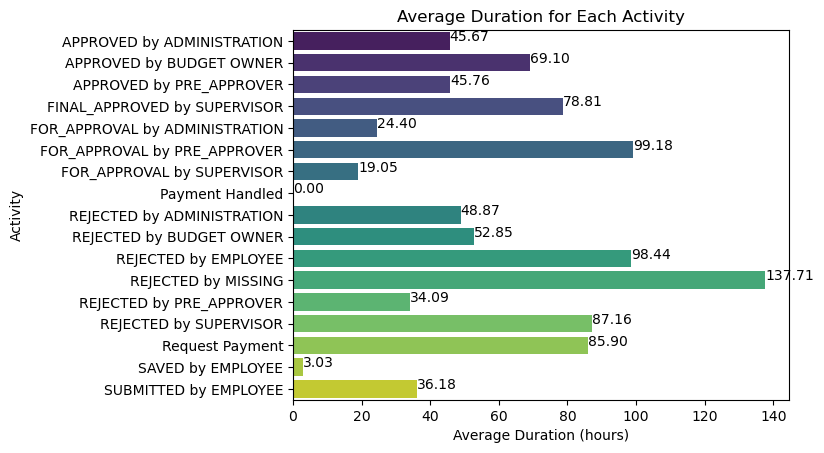

In [429]:

average_durations_hours = average_durations.dt.total_seconds() / 3600 # Conversion to hours

sns.barplot(x=average_durations_hours.values, y=average_durations_hours.index, palette="viridis")

plt.ylabel('Activity')
plt.xlabel('Average Duration (hours)')
plt.title('Average Duration for Each Activity in Hours')

for i, value in enumerate(average_durations_hours.values):  # Display values next to the bars
    plt.text(value, i, f"{value:.2f}")

plt.show()

The barchart above displays the avereage duration of each activity to another.  
TBD: Show Min /Median / Max Duration. Maybe replace this barchart with boxplot.

Text:
- Payment Handled
- Saved by employee
- REJECTED by MISSING

In [431]:
log[log['concept:name'] == 'SAVED by EMPLOYEE']  # only 135 occurencies. At first glance, the column 'duration' does not align with the barchart above.

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount,start_timestamp,duration
12150,st_step 100881_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-24 21:34:06+00:00,EMPLOYEE,declaration 100880,declaration 100880,budget 86566,UNKNOWN,0.0,2018-01-24 21:34:06+00:00,0 days
16749,st_step 101427_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-02-27 14:19:55+00:00,EMPLOYEE,declaration 101426,declaration 101426,budget 86566,UNKNOWN,0.0,2018-02-27 14:19:55+00:00,0 days
12755,st_step 101611_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-29 19:32:54+00:00,EMPLOYEE,declaration 101610,declaration 101610,budget 86566,UNKNOWN,0.0,2018-01-29 19:32:54+00:00,0 days
13621,st_step 101988_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-02-05 07:45:45+00:00,EMPLOYEE,declaration 101987,declaration 101987,budget 86566,UNKNOWN,0.0,2018-02-05 07:45:45+00:00,0 days
10505,st_step 102048_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-10 12:27:40+00:00,EMPLOYEE,declaration 102047,declaration 102047,budget 86566,UNKNOWN,0.0,2018-01-10 12:27:40+00:00,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
14222,st_step 97402_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-02-07 12:18:13+00:00,EMPLOYEE,declaration 97401,declaration 97401,budget 86566,UNKNOWN,0.0,2018-02-07 12:18:13+00:00,0 days
20621,st_step 98056_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-03-29 15:02:06+00:00,EMPLOYEE,declaration 98055,declaration 98055,budget 86566,UNKNOWN,0.0,2018-03-29 15:02:06+00:00,0 days
10067,st_step 99094_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-06 09:33:56+00:00,EMPLOYEE,declaration 99093,declaration 99093,budget 86566,UNKNOWN,0.0,2018-01-06 09:33:56+00:00,0 days
10990,st_step 99494_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-16 10:32:21+00:00,EMPLOYEE,declaration 99493,declaration 99493,budget 86566,UNKNOWN,0.0,2018-01-16 10:32:21+00:00,0 days


Filtering now those rows with the same case:concept:name as those where concept:name == SAVED by Employee

In [432]:
saved_by_employee_rows = log[log['concept:name'] == 'SAVED by EMPLOYEE']

unique_case_concept_names = saved_by_employee_rows['case:concept:name'].unique()

filtered_log = log[log['case:concept:name'].isin(unique_case_concept_names)]
filtered_log  # 137 occurencies

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount,start_timestamp,duration
12150,st_step 100881_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-24 21:34:06+00:00,EMPLOYEE,declaration 100880,declaration 100880,budget 86566,UNKNOWN,0.0,2018-01-24 21:34:06+00:00,0 days
16749,st_step 101427_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-02-27 14:19:55+00:00,EMPLOYEE,declaration 101426,declaration 101426,budget 86566,UNKNOWN,0.0,2018-02-27 14:19:55+00:00,0 days
12755,st_step 101611_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-29 19:32:54+00:00,EMPLOYEE,declaration 101610,declaration 101610,budget 86566,UNKNOWN,0.0,2018-01-29 19:32:54+00:00,0 days
13621,st_step 101988_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-02-05 07:45:45+00:00,EMPLOYEE,declaration 101987,declaration 101987,budget 86566,UNKNOWN,0.0,2018-02-05 07:45:45+00:00,0 days
10505,st_step 102048_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-10 12:27:40+00:00,EMPLOYEE,declaration 102047,declaration 102047,budget 86566,UNKNOWN,0.0,2018-01-10 12:27:40+00:00,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
14222,st_step 97402_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-02-07 12:18:13+00:00,EMPLOYEE,declaration 97401,declaration 97401,budget 86566,UNKNOWN,0.0,2018-02-07 12:18:13+00:00,0 days
20621,st_step 98056_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-03-29 15:02:06+00:00,EMPLOYEE,declaration 98055,declaration 98055,budget 86566,UNKNOWN,0.0,2018-03-29 15:02:06+00:00,0 days
10067,st_step 99094_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-06 09:33:56+00:00,EMPLOYEE,declaration 99093,declaration 99093,budget 86566,UNKNOWN,0.0,2018-01-06 09:33:56+00:00,0 days
10990,st_step 99494_0,STAFF MEMBER,SAVED by EMPLOYEE,2018-01-16 10:32:21+00:00,EMPLOYEE,declaration 99493,declaration 99493,budget 86566,UNKNOWN,0.0,2018-01-16 10:32:21+00:00,0 days


In [433]:
filtered_log[filtered_log['case:concept:name'] == 'declaration 95149']

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount,start_timestamp,duration
3356,st_step 95151_0,STAFF MEMBER,SAVED by EMPLOYEE,2017-05-12 13:23:58+00:00,EMPLOYEE,declaration 95149,declaration 95149,budget 86566,declaration number 95150,51.927888,2017-05-12 13:23:58+00:00,17 days 00:48:01
3357,dd_declaration 95149_19,SYSTEM,Request Payment,2017-05-29 14:11:59+00:00,UNDEFINED,declaration 95149,declaration 95149,budget 86566,declaration number 95150,51.927888,2017-05-29 14:11:59+00:00,3 days 01:18:52
3358,dd_declaration 95149_20,SYSTEM,Payment Handled,2017-06-01 15:30:51+00:00,UNDEFINED,declaration 95149,declaration 95149,budget 86566,declaration number 95150,51.927888,2017-06-01 15:30:51+00:00,0 days 00:00:00


Generally, the activity "SAVED by EMPLOYEE" seems to be no part of any workflow. The only case which has more than one activity containing the "SAVED by EMPLOYEE" activity, is declaration 95149

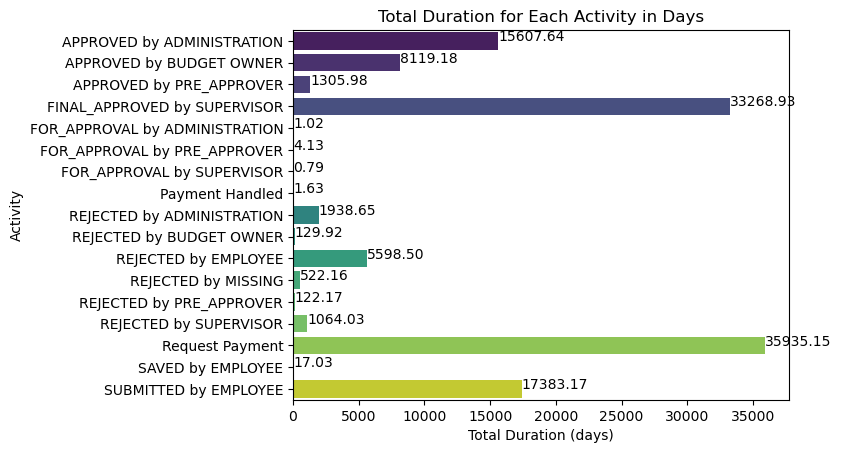

In [448]:
total_durations_days = total_durations.dt.total_seconds() / 3600 / 24 # Conversions to hours

sns.barplot(x=total_durations_days.values, y=total_durations_days.index, palette="viridis")


plt.ylabel('Activity')
plt.xlabel('Total Duration (days)')
plt.title('Total Duration for Each Activity in Days')

for i, value in enumerate(total_durations_days.values):  # Display values next to the bars
    plt.text(value, i, f"{value:.2f}")

plt.show()

--- 
- Are there any bottlenecks? If yes, where? If yes, can you think of any reasons?
    -> Prozessdauer vizualisieren auf Petri Net(?)
    -> [medium](https://medium.com/@c3_62722/process-mining-with-python-tutorial-a-healthcare-application-part-4-912286ee51b)

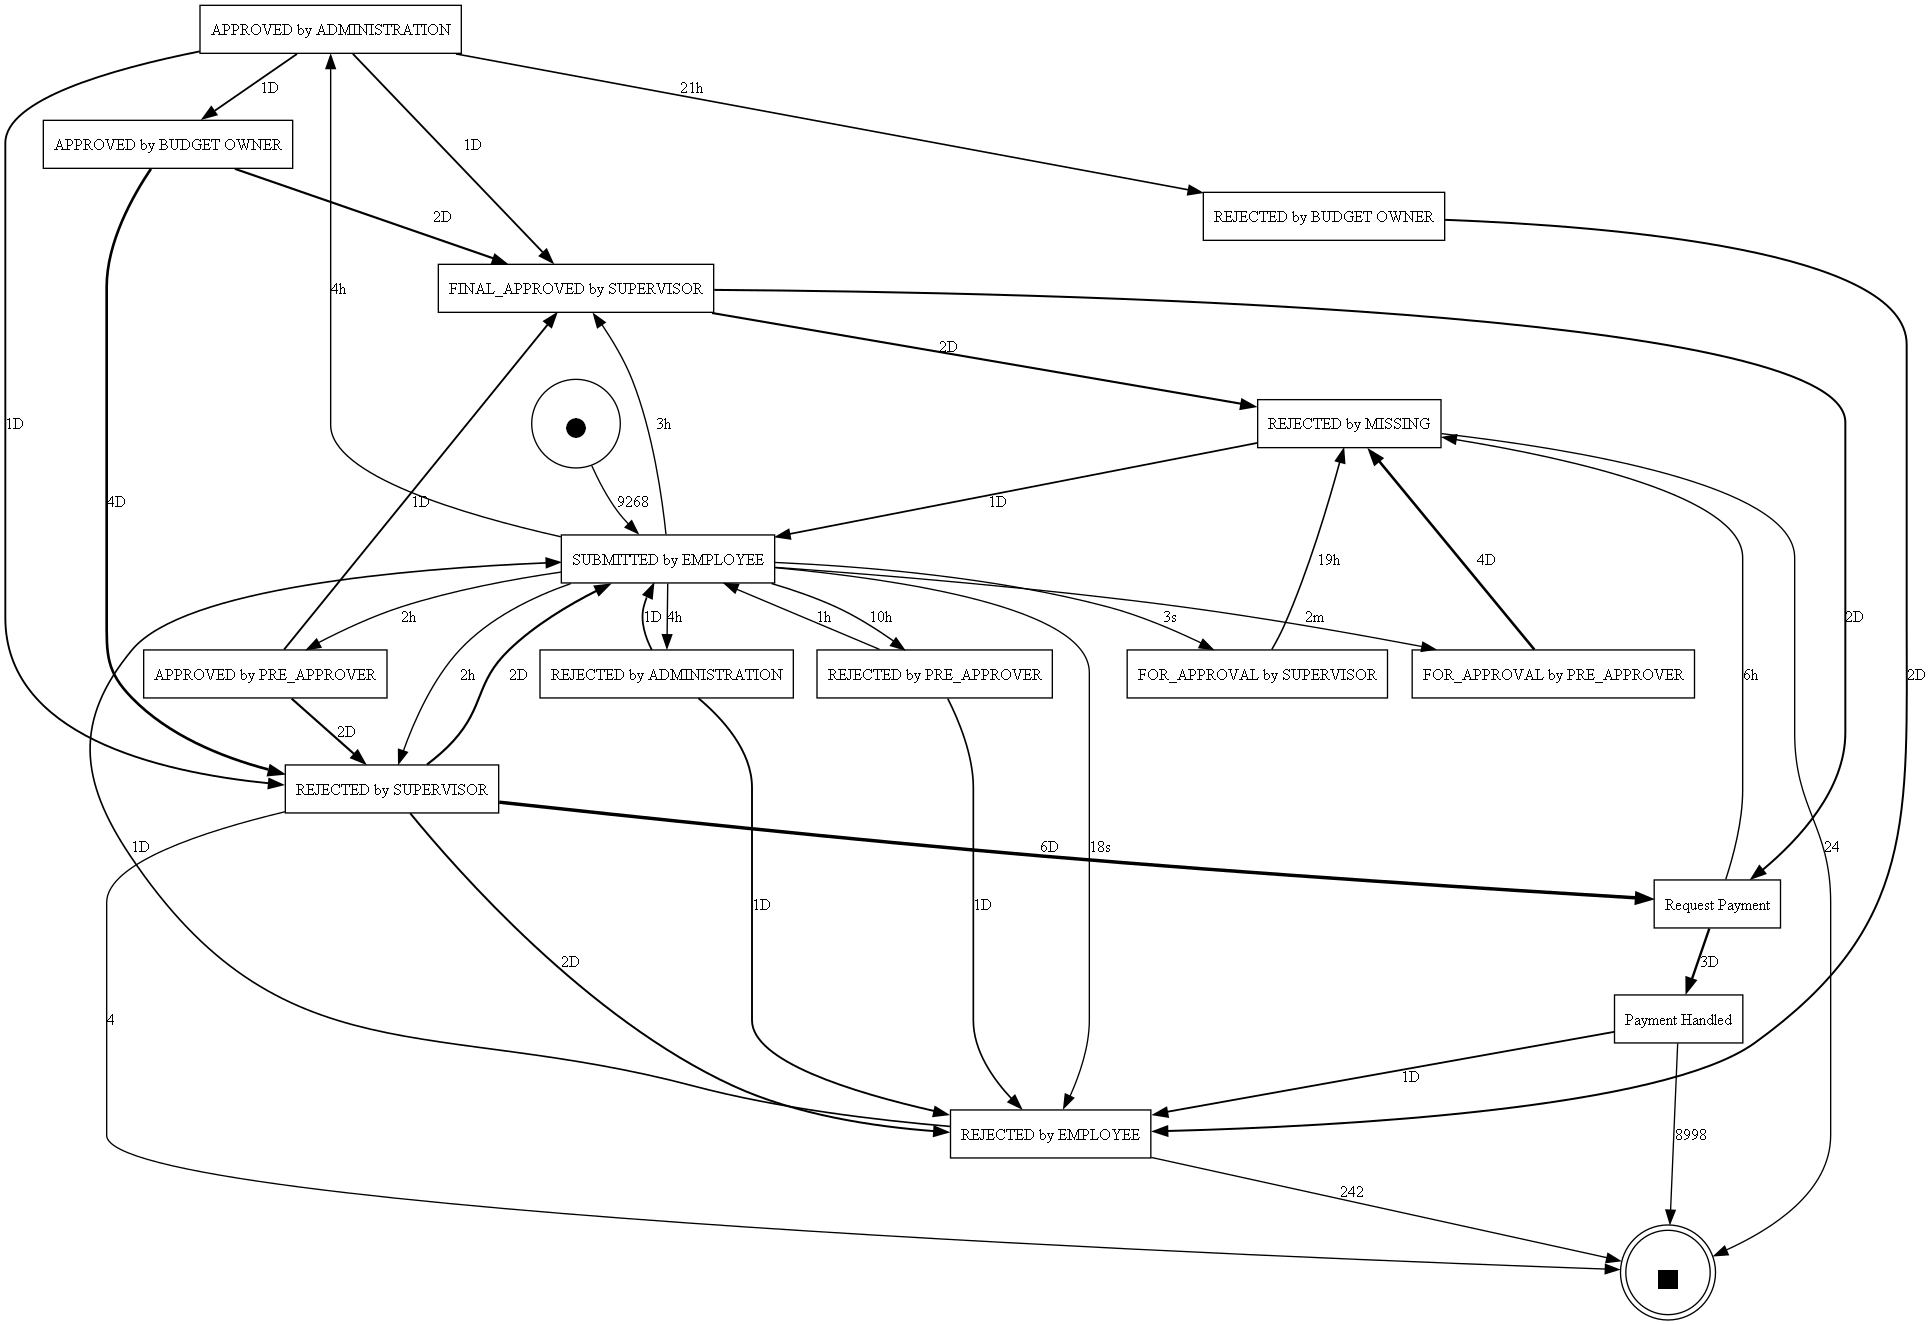

In [435]:
filtered_log = pm4py.filter_case_performance(
    log, 
    3600.0, # min (1 min)
    1728000.0, #max (20d) in seconds
    timestamp_key='time:timestamp', 
    case_id_key='case:concept:name')  
     
#filtered_log = pm4py.filter_paths_performance(log, ('SUBMITTED by EMPLOYEE', 'Request Payment'), 0, 86400.0, activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(filtered_log, case_id_key='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')

pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities, format='png')

Obvious bottlenecks:
- Request Payment -> Payment Handled (System)

DISCO (Map -> Performance Total Duration): 
- Final_Approved by Supervisor -> Request Payment

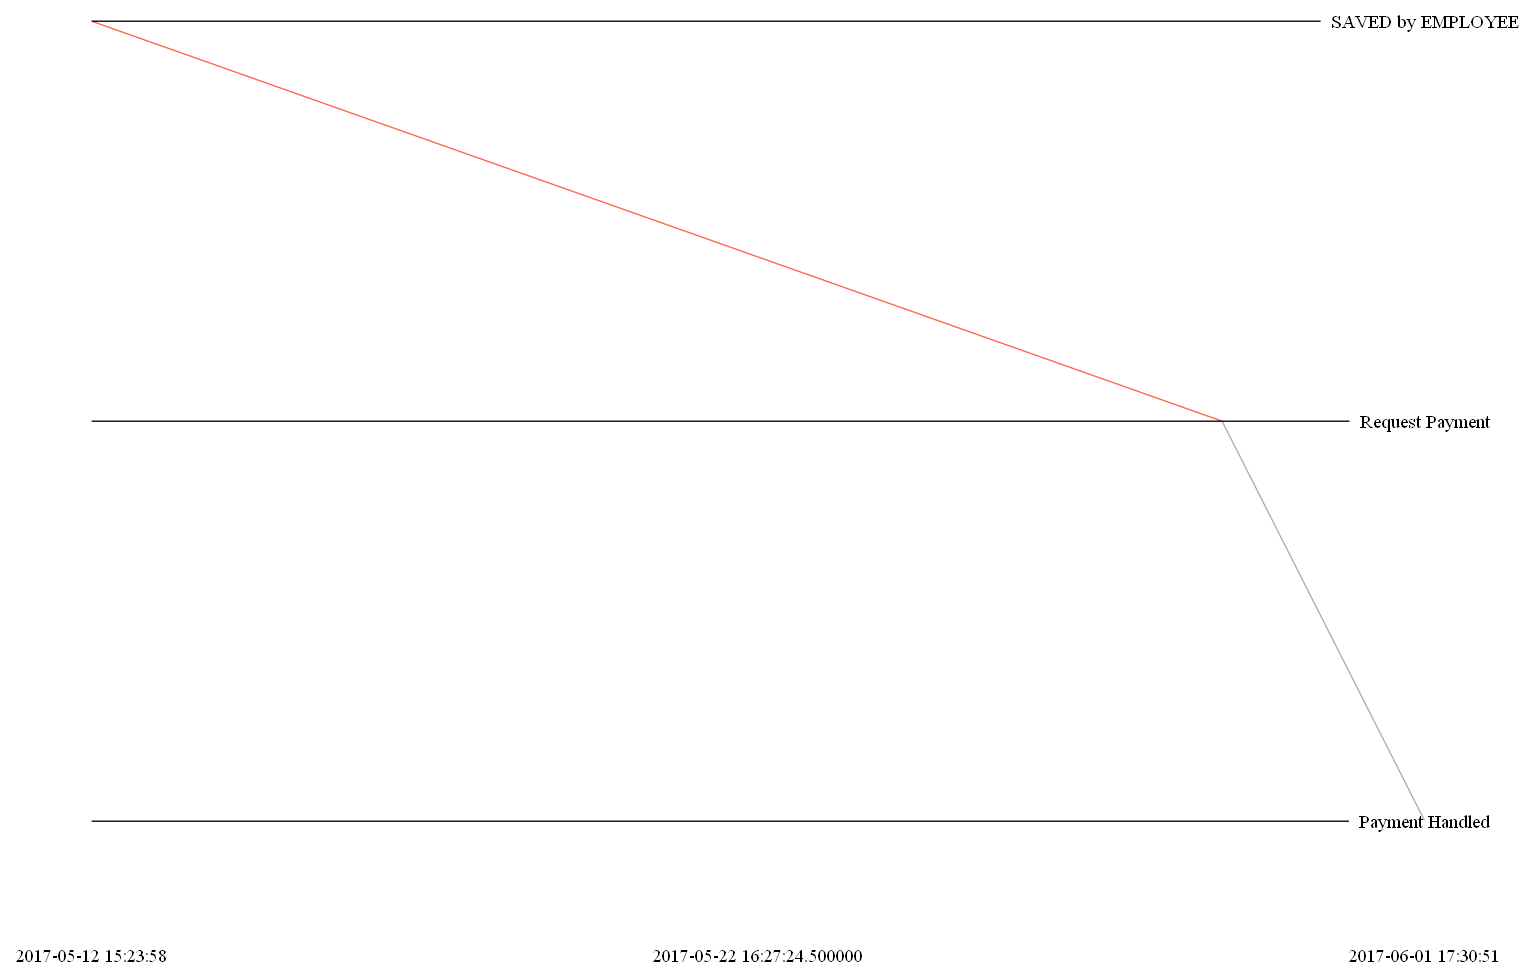

In [436]:
pm4py.view_performance_spectrum(
    dataframe,
    ['SAVED by EMPLOYEE', 'Request Payment', 'Payment Handled'],
    format='png',
    activity_key='concept:name',
    case_id_key='case:concept:name',
    timestamp_key='time:timestamp')

--- 
- Handover Network

In [437]:

metric = pm4py.discover_handover_of_work_network(
    log, 
    resource_key='org:role', 
    timestamp_key='time:timestamp', 
    case_id_key='case:concept:name')  
pm4py.vis.view_sna(metric)  # Creates the .html file containing the network of the handover of work

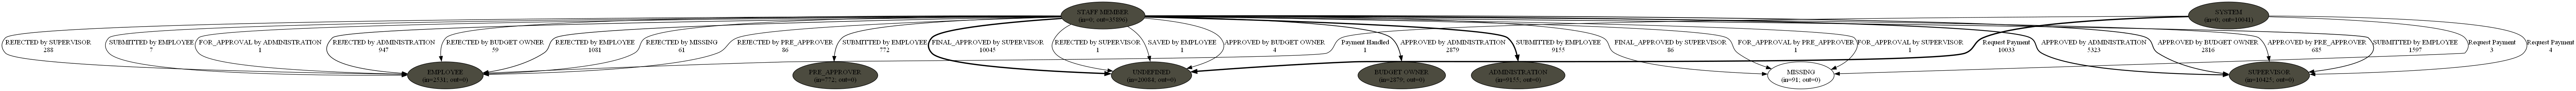

In [441]:

net_ana = pm4py.discover_network_analysis(log, out_column='case:concept:name', in_column='case:concept:name', node_column_source='org:resource', node_column_target='org:role', edge_column='concept:name')
pm4py.view_network_analysis(net_ana, format='png')

---
- How many applications get rejected? Can you find any reasons?


In [438]:
# model fitness
net, im, fm = pm4py.discover_petri_net_inductive(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
fitness_alignments = pm4py.fitness_alignments(log, net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

aligning log, completed variants ::   0%|          | 0/99 [00:00<?, ?it/s]

In [449]:
fitness_alignments

{'percFitTraces': 100.0,
 'averageFitness': 1.0,
 'percentage_of_fitting_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 0.9997343543748926}

In [439]:
net, im, fm = pm4py.discover_petri_net_inductive(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
fitness_tbr = pm4py.fitness_token_based_replay(log, net, im, fm, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

replaying log with TBR, completed variants ::   0%|          | 0/99 [00:00<?, ?it/s]

In [450]:
fitness_tbr

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

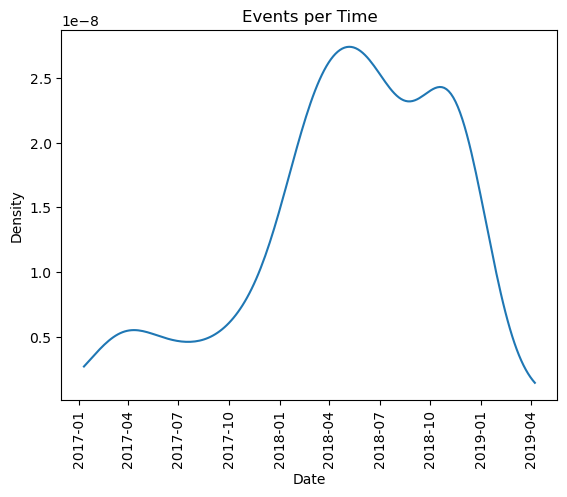

In [440]:
pm4py.view_events_per_time_graph(log, format='png', activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')  # Vacation time